In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq, irfft, dct, idct
import cv2
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

import sig_analize as sa
import generate_areas as ga
%load_ext autoreload
%autoreload 2

In [2]:
dir_path = './drop-250925-4'
img_path_list = [dir_path + '/'+ f for f in os.listdir(dir_path) if f.endswith('.jpg')]
img_path_list.sort()
img_path_list

['./drop-250925-4/155.jpg',
 './drop-250925-4/160.jpg',
 './drop-250925-4/165.jpg',
 './drop-250925-4/170.jpg',
 './drop-250925-4/175.jpg']

In [3]:
json_path = 'sequence.txt'

ga.choose_multy(img_path_list, json_path, mode='common')

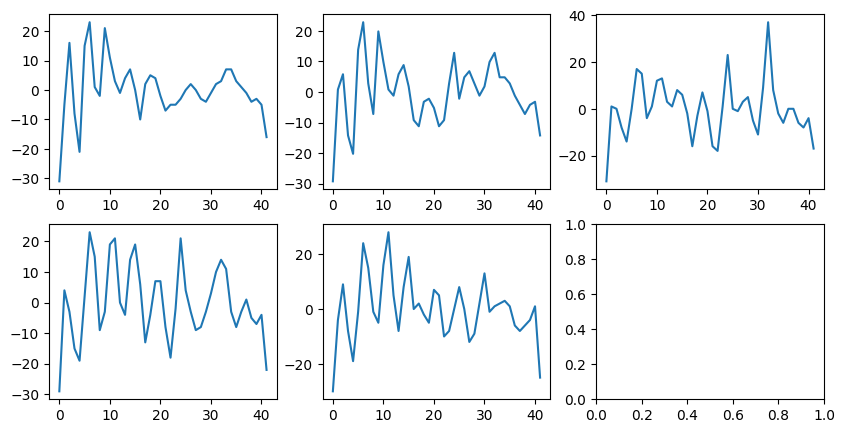

In [12]:
# upload ntencity distributions from json file and
# look at the integral intencity distribution plotted

with open(json_path,'r') as f:
    imgs = json.load(f)[:-1]

img_count = len(imgs)
row_count = (img_count+img_count%3)//3

fig, ax = plt.subplots(row_count, 3, figsize=(5*row_count, 5))

for i in range(img_count):
    ax[i//3][i%3].plot(imgs[i])

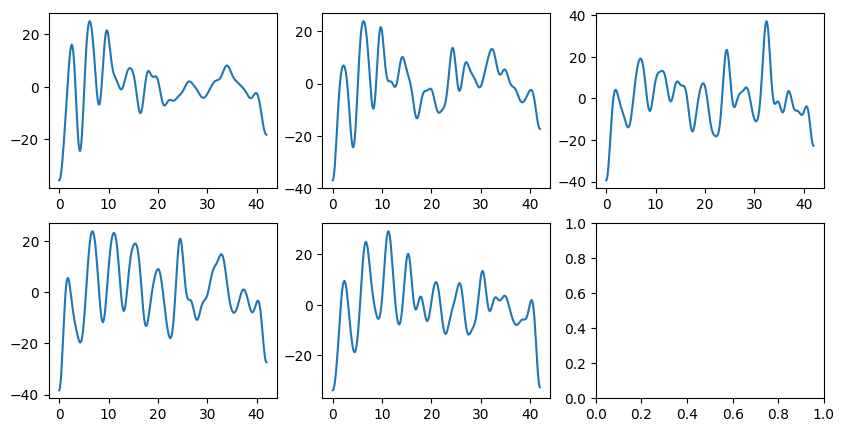

In [15]:
# approximate the graphs with sums of cosinusoids using dct
# and plot the smoother versions 

sig_len = len(imgs[0]) # for mode='commom' length is the same for all signals

N = 300
fs = 0.5*sig_len/N

coeffs = [dct(sig) for sig in imgs]
sig_sm = [sa.fourie_restore(coeff, sig_len, fs, N, mode='cos') for coeff in coeffs]

fig, ax = plt.subplots(row_count, 3, figsize=(5*row_count, 5))

for i in range(img_count):
    ax[i//3][i%3].plot(*sig_sm[i])

In [21]:
# here we get the number of fringes and phase velocity for every signal

num_vel_list = [sa.analize_signal(sig[1], 2*fs) for sig in sig_sm]

for item in num_vel_list:
    print(f" number of fringes: {item[0]}; phase velocity: {item[1]} \n")

 number of fringes: 6; phase velocity: 0.052095201312199614 

 number of fringes: 9; phase velocity: 0.11954635766190372 

 number of fringes: 9; phase velocity: 0.11896344994976409 

 number of fringes: 9; phase velocity: 0.0950770517671827 

 number of fringes: 8; phase velocity: 0.07210520519588963 

